# Simple Neural Network
A simple 3 layer classifier in python - with no bias or regularization.
Created on a [vnode](https://github.com/thomaswilley/vnode) :)

@thomaswilley

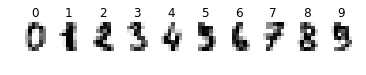

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
%matplotlib inline

src_X, src_y = load_digits(return_X_y=True)
m, dim_input = src_X.shape
dim_hidden = 100
dim_output = 10
m_train = 1000

X_train = src_X[0:m_train, :] / 255
X_test = src_X[m_train+1::, :]/ 255

y = np.zeros((m, 10))
y[np.arange(m), src_y]=1
y_train = y[0:m_train, :]
y_test = y[m_train+1::, :]

img_dim = int(np.sqrt(src_X.shape[1]))
images_and_labels = list(zip(src_X.reshape(m, img_dim, img_dim), src_y))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('{}'.format(label))

In [2]:
def nonlin_sigmoid(x, deriv=False):
    if deriv:
        return x * (1. - x)
    return 1. / (1 + np.exp(-x))

def nonlin_relu(x, deriv=False):
    if deriv:
        return 1. * (x > 0)
    return np.maximum(x, 0)

def forward(model, x):
    z1 = np.dot(model['w1'].T, x)
    a1 = model['nonlin'](z1)
    z2 = np.dot(model['w2'].T, a1)
    a2 = model['nonlin'](z2)
    return (z1, a1, z2, a2)

def backward(model, x, z1, a1, z2, a2, y):
    loss = a2 - y
    grad_w2 = np.dot(a1, loss.T)
    grad_a1 = np.dot(model['w2'], loss) * model['nonlin'](a1, deriv=True)
    grad_w1 = np.dot(x, grad_a1.T)
    return (loss, grad_w1, grad_w2)

def predict(model, x):
    return np.argmax(forward(model, x)[3])

def accuracy(model, X, y):
    correct = []
    m = X.shape[0]
    for i in range(m):
        y_hat = predict(model, X[i,:].reshape(-1, 1))
        _y = np.argmax(y[i,:].reshape(-1, 1))
        correct.append(y_hat == _y)
    return np.sum(1.*np.array(correct)) / m

def create_model(dim_input, dim_hidden, dim_output, nonlin=nonlin_sigmoid, epochs=30, learning_rate=0.9):    
    model = {}
    model['dims'] = (dim_input, dim_hidden, dim_output)
    model['nonlin'] = nonlin # which non linearity fn we use for the activations of hidden & output
    model['w1'] = np.random.random((dim_input, dim_hidden))
    model['w2'] = np.random.random((dim_hidden, dim_output))
    model['epochs'] = epochs
    model['learning_rate'] = learning_rate
    return model

def train_model(model):
    all_examples_err = []
    for e in range(model['epochs']):
        single_example_err = []
        for i in range(m_train):
            _x = X_train[i,:].reshape(-1, 1)
            _y = y_train[i,:].reshape(-1, 1)

            z1, a1, z2, a2 = forward(model, _x)
            loss, grad_w1, grad_w2 = backward(model, _x, z1, a1, z2, a2, _y)

            model['w2'] -= model['learning_rate'] * grad_w2
            model['w1'] -= model['learning_rate'] * grad_w1

            single_example_err.append(np.square(loss).sum())

        all_examples_err.append(np.sum(single_example_err) / m_train)
    model['error'] = all_examples_err
    return model

def plot_model_error(model, label="Model"):
    f, ax = plt.subplots()
    ax.plot(model['error'])
    ax.set_title("Model-{} Train accuracy: {:.02f}%\nTest accuracy: {:.02f}%".format(
        label,
        accuracy(model, X_train, y_train),
        accuracy(model, X_test, y_test)))

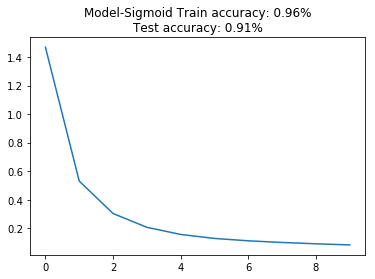

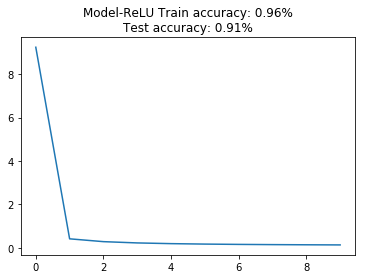

In [3]:
model1 = create_model(dim_input, dim_hidden, dim_output, nonlin=nonlin_sigmoid, epochs=10, learning_rate=0.9)
model1 = train_model(model1)
plot_model_error(model1, "Sigmoid")

model2 = create_model(dim_input, dim_hidden, dim_output, nonlin=nonlin_relu, epochs=10, learning_rate=0.05)
model2 = train_model(model2)
plot_model_error(model2, "ReLU")

model 1 predicts 7
model 2 predicts 7


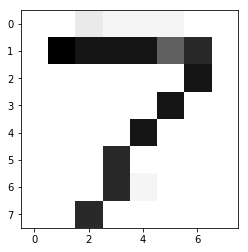

In [4]:
# "create" an arbitrary digit and predict its label
example = np.array([[  0.,   0.,   2.,  1.,   1.,   1.,   0.,   0.],
           [  0.,   24.,  22.,  22.,  22.,  15.,   20.,   0.],
           [  0.,   0.,  0.,   0.,   0.,  0.,   22.,   0.],
           [  0.,   0.,  0.,   0.,   0.,  22.,   0.,   0.],
           [  0.,   0.,   0.,   0.,   22.,   0.,   0.,   0.],
           [  0.,   0.,  0.,   20.,   0.,  0.,   0.,   0.],
           [  0.,   0.,  0.,   20.,  1.,  0.,   0.,   0.],
           [  0.,   0.,   20.,  0.,  0.,   0.,   0.,   0.]])
f, ax = plt.subplots(figsize=(4,4))
ax.imshow(example, cmap=plt.cm.gray_r)
print("model 1 predicts {}\nmodel 2 predicts {}".format(
    predict(model1, example.reshape(-1, 1)),
    predict(model2, example.reshape(-1, 1))))